                                      PROJET FIL ROUGE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import pandas as pd



t1=pd.read_csv(r"C:\Users\Administrateur.OTR-2018-503\Downloads\mess\atp_data.csv", sep=",")
t2=pd.read_csv(r"C:\Users\Administrateur.OTR-2018-503\Downloads\mess\confidence_data.csv", sep=",")

print(t1.tail())
print("_________________________")
print(t2.head())
%matplotlib inline
sns.set_theme()


       ATP   Location                  Tournament        Date  Series  \
44703   17     Dubai   Dubai Tennis Championships  2018-03-03  ATP500   
44704   16   Acapulco            Abierto Mexicano  2018-03-03  ATP500   
44705   18  Sao Paulo                 Brasil Open  2018-03-03  ATP250   
44706   16   Acapulco            Abierto Mexicano  2018-03-04  ATP500   
44707   18  Sao Paulo                 Brasil Open  2018-03-04  ATP250   

         Court Surface       Round  Best of            Winner  ... Wsets  \
44703  Outdoor    Hard   The Final        3  Bautista Agut R.  ...   2.0   
44704  Outdoor    Hard  Semifinals        3       Anderson K.  ...   2.0   
44705   Indoor    Clay  Semifinals        3          Jarry N.  ...   2.0   
44706  Outdoor    Hard   The Final        3    Del Potro J.M.  ...   2.0   
44707   Indoor    Clay   The Final        3        Fognini F.  ...   2.0   

       Lsets    Comment   PSW   PSL B365W  B365L   elo_winner    elo_loser  \
44703    0.0  Completed  1

In [2]:
print(t1["Winner"])

0              Dosedel S.
1               Kiefer N.
2               Gaudio G.
3           El Aynaoui Y.
4            Cherkasov A.
               ...       
44703    Bautista Agut R.
44704         Anderson K.
44705            Jarry N.
44706      Del Potro J.M.
44707          Fognini F.
Name: Winner, Length: 44708, dtype: object


In [3]:
print(len(t1["Winner"].unique()))
print(t1["Tournament"].value_counts(normalize=True)*100)



899
Australian Open           4.829113
French Open               4.545048
US Open                   4.545048
Wimbledon                 4.545048
Sony Ericsson Open        2.124899
                            ...   
Lyon Open                 0.060392
Portugal Open             0.060392
Ricoh Open                0.060392
Gazprom Hungarian Open    0.060392
Tata Open                 0.060392
Name: Tournament, Length: 207, dtype: float64


                                     INFO SUR LE DATASET ATP_DATA

In [4]:
t1.info()
print("_______________________________________")
somme_t1=t1.isna().sum().sum()
moyenne_t1=round((t1.isna().mean().mean()*100), 2)
print("Sur l'ensemble du dataset t1, il manque", somme_t1, "données. Ce qui représente", moyenne_t1," % du jeu de données")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         44708 non-null  int64  
 1   Location    44708 non-null  object 
 2   Tournament  44708 non-null  object 
 3   Date        44708 non-null  object 
 4   Series      44708 non-null  object 
 5   Court       44708 non-null  object 
 6   Surface     44708 non-null  object 
 7   Round       44708 non-null  object 
 8   Best of     44708 non-null  int64  
 9   Winner      44708 non-null  object 
 10  Loser       44708 non-null  object 
 11  WRank       44708 non-null  int64  
 12  LRank       44708 non-null  int64  
 13  Wsets       44521 non-null  float64
 14  Lsets       44521 non-null  float64
 15  Comment     44708 non-null  object 
 16  PSW         32743 non-null  float64
 17  PSL         32743 non-null  float64
 18  B365W       39037 non-null  float64
 19  B365L       39057 non-nul

In [5]:

t2.info()
print("_______________________________________")
somme_t2=t2.isna().sum().sum()
moyenne_t2=round((t2.isna().mean().mean()*100), 2)
print("Sur l'ensemble du dataset t2, il manque", somme_t2, "données. Ce qui représente", moyenne_t2," % du jeu de données")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        11054 non-null  int64  
 1   PSW          11008 non-null  float64
 2   win0         11054 non-null  int64  
 3   confidence0  11054 non-null  float64
 4   date         11054 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 431.9+ KB
_______________________________________
Sur l'ensemble du dataset t2, il manque 46 données. Ce qui représente 0.08  % du jeu de données


In [6]:
t1["Date"]=pd.to_datetime(t1["Date"])
t2["date"]=pd.to_datetime(t2["date"])
print(t1.info())
print("_________________________________")
print(t2.info())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         44708 non-null  int64         
 1   Location    44708 non-null  object        
 2   Tournament  44708 non-null  object        
 3   Date        44708 non-null  datetime64[ns]
 4   Series      44708 non-null  object        
 5   Court       44708 non-null  object        
 6   Surface     44708 non-null  object        
 7   Round       44708 non-null  object        
 8   Best of     44708 non-null  int64         
 9   Winner      44708 non-null  object        
 10  Loser       44708 non-null  object        
 11  WRank       44708 non-null  int64         
 12  LRank       44708 non-null  int64         
 13  Wsets       44521 non-null  float64       
 14  Lsets       44521 non-null  float64       
 15  Comment     44708 non-null  object        
 16  PSW         32743 non-

In [7]:
t1 = t1.dropna(axis = 0, how = 'any')
print(t1.isna().sum())
print(t1.shape)
#12517 lignes supprimés
#Nous décidons de supprimer les lignes de codes avec des NaNs car nous n'avons pas la possibilité de
#les remplacer par la moyenne, la médian ou le mode. Cela fausserai l'algorithme.


ATP           0
Location      0
Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Winner        0
Loser         0
WRank         0
LRank         0
Wsets         0
Lsets         0
Comment       0
PSW           0
PSL           0
B365W         0
B365L         0
elo_winner    0
elo_loser     0
proba_elo     0
dtype: int64
(32191, 23)


In [8]:
t1.set_index("ATP")

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,...,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
ATP,,,,,,,,,,,,,,,,,,,,,
3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Ulihrach B.,Kiefer N.,...,2.0,0.0,Completed,2.210,1.719,2.200,1.615,1486.195239,1618.182210,0.318694
3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Youzhny M.,Schuettler R.,...,2.0,0.0,Completed,3.250,1.385,2.875,1.364,1615.057648,1820.759485,0.234313
3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Sargsian S.,Carraz G.,...,2.0,1.0,Completed,1.746,2.180,1.571,2.250,1654.468551,1588.330984,0.594046
2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Lisnard J.R.,Pless K.,...,2.0,0.0,Completed,1.562,2.580,1.571,2.250,1533.308961,1473.299803,0.585511
2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Levy H.,Portas A.,...,2.0,0.0,Completed,1.641,2.360,1.570,2.250,1401.283125,1418.621881,0.475068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Dubai,Dubai Tennis Championships,2018-03-03,ATP500,Outdoor,Hard,The Final,3,Bautista Agut R.,Pouille L.,...,2.0,0.0,Completed,1.650,2.430,1.660,2.200,1835.901543,1842.459807,0.490563
16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,3,Anderson K.,Donaldson J.,...,2.0,1.0,Completed,1.340,3.630,1.300,3.500,1843.576914,1647.967561,0.755103
18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,3,Jarry N.,Zeballos H.,...,2.0,1.0,Completed,1.850,2.090,1.900,1.900,1588.293069,1619.758421,0.454841


In [9]:
t1.dtypes

ATP                    int64
Location              object
Tournament            object
Date          datetime64[ns]
Series                object
Court                 object
Surface               object
Round                 object
Best of                int64
Winner                object
Loser                 object
WRank                  int64
LRank                  int64
Wsets                float64
Lsets                float64
Comment               object
PSW                  float64
PSL                  float64
B365W                float64
B365L                float64
elo_winner           float64
elo_loser            float64
proba_elo            float64
dtype: object

In [10]:
print(t1["Location"].unique())
print("La colonne Location du dataset fusion représente les lieux ou se sont déroulés les tournois")


['Doha' 'Chennai' 'Adelaide' 'Auckland' 'Sydney' 'Melbourne'
 'Vina del Mar' 'San Jose' 'Milan' 'Memphis' 'Rotterdam' 'Buenos Aires'
 'Marseille' 'Costa Do Sauipe' 'Dubai ' 'Scottsdale' 'Acapulco'
 'Indian Wells' 'Miami' 'Valencia' 'Houston' 'Estoril ' 'Monte Carlo'
 'Barcelona' 'Munich' 'Rome' 'Hamburg' 'St. Polten' 'Casablanca' 'Paris'
 'Queens Club' 'Halle' 'Nottingham' "'s-Hertogenbosch" 'London' 'Bastad'
 'Gstaad' 'Newport' 'Los Angeles' 'Stuttgart' 'Amersfoort' 'Kitzbuhel'
 'Umag' 'Indianapolis' 'Toronto' 'Cincinnati' 'Sopot' 'Washington'
 'Long Island' 'New York' 'Bucharest' 'Delray Beach' 'Beijing' 'Palermo'
 'Shanghai' 'Bangkok' 'Tokyo' 'Lyon' 'Moscow' 'Vienna' 'Metz' 'Madrid'
 'St. Petersburg' 'Stockholm' 'Basel' 'Montreal' 'New Haven'
 'Ho Chi Min City' 'Zagreb' 'Las Vegas' 'Portschach' 'Mumbai' 'Warsaw'
 'Brisbane' 'Santiago' 'Johannesburg ' 'Belgrade' 'Nice' 'Eastbourne'
 'Atlanta' 'Kuala Lumpur' 'Montpellier' 'Winston-Salem' 'Sao Paulo'
 'Oeiras' 'Dusseldorf' 'Bogota' 'Qu

In [11]:
print(t1["Tournament"].unique())
print("La colonne Tournament du dataset fusion représente le nom des tournois")

['Qatar Exxon Mobil Open' 'TATA Open' 'AAPT Championships' 'Heineken Open'
 'adidas International' 'Australian Open' 'Bellsouth Open' 'Siebel Open'
 'Indesit ATP Milano Indoor ' 'Kroger St. Jude'
 'ABN AMRO World Tennis Tournament' 'ATP Buenos Aires 2004' 'Open 13'
 'Brasil Open' 'Dubai Championships' 'Franklin Templeton Tennis Classic'
 'Abierto Mexicano' 'Pacific Life Open' 'NASDAQ-100 Open'
 'CAM Open Comunidad Valenciana' "U.S. Men's Clay Court Championships"
 'Estoril Open' 'Monte Carlo Masters' 'Open Seat Godo' 'BMW Open'
 'Telecom Italia Masters Roma' 'Hamburg TMS'
 'Internationaler Raiffeisen Grand Prix' 'Grand Prix Hassan II'
 'French Open' 'Stella Artois' 'Gerry Weber Open' 'Nottingham Open'
 'Ordina Open' 'Wimbledon' 'Swedish Open' 'Allianz Suisse Open'
 'Hall of Fame Championships' 'Mercedes-Benz Cup' 'Mercedes Cup'
 'Priority Telecom Dutch Open' 'Generali Open' 'Croatia Open'
 'RCA Championships' 'Toronto TMS'
 'Western & Southern Financial Group Masters' 'Idea Prokom Open

In [12]:
print(t1["Series"].value_counts())
print("La colonne Series du dataset fusion représente la catégories de tournoi.")




ATP250                8176
Grand Slam            6148
International         6067
Masters 1000          3900
ATP500                3025
Masters               2827
International Gold    1872
Masters Cup            176
Name: Series, dtype: int64
La colonne Series du dataset fusion représente la catégories de tournoi.


In [13]:
print(t1["Court"].value_counts())
print("La colonne Court du dataset fusion permet de savoir si le match a eu lieu à l'intérieur ou à l'extérieur.")
#Variable que l'on va pouvoir utiliser par la suite en remplaçant les valeurs par 0 et 1.

Outdoor    26306
Indoor      5885
Name: Court, dtype: int64
La colonne Court du dataset fusion permet de savoir si le match a eu lieu à l'intérieur ou à l'extérieur.


In [14]:
print(t1["Surface"].value_counts())
print("La colonne Surface du dataset fusion permet de savoir sur quel type de surface a eu lieu le match.")
#Variable que l'on va pouvoir utiliser par la suite en remplaçant les valeurs par 0, 1 et 2.

Hard      17354
Clay      10265
Grass      3610
Carpet      962
Name: Surface, dtype: int64
La colonne Surface du dataset fusion permet de savoir sur quel type de surface a eu lieu le match.


In [15]:
print(t1["Round"].value_counts())
print("La colonne Round du dataset fusion permet de savoir combien de match a eu lieu en fonction des phases finales.")

1st Round        14547
2nd Round         9045
Quarterfinals     3105
3rd Round         2288
Semifinals        1581
The Final          797
4th Round          578
Round Robin        250
Name: Round, dtype: int64
La colonne Round du dataset fusion permet de savoir combien de match a eu lieu en fonction des phases finales.


In [16]:
print(t1["Winner"].value_counts())
print("La colonne Winner du dataset fusion permet de savoir combien de match chaque joueurs a remporté.")

Federer R.         735
Nadal R.           705
Djokovic N.        603
Ferrer D.          548
Murray A.          488
                  ... 
Eaton C.             1
Lopez-Jaen M.A.      1
Cruciat A.           1
Quinzi G.            1
Ghem A.              1
Name: Winner, Length: 665, dtype: int64
La colonne Winner du dataset fusion permet de savoir combien de match chaque joueurs a remporté.


In [17]:
print(t1["Loser"].value_counts())
print("La colonne Loser du dataset fusion permet de savoir combien de match chaque joueurs a perdu.")



Verdasco F.        298
Lopez F.           294
Seppi A.           272
Ferrer D.          267
Garcia-Lopez G.    265
                  ... 
Vardhan V.           1
Scholtz N.           1
Miranda I.           1
Si Y.M.              1
Gigounon G.          1
Name: Loser, Length: 1019, dtype: int64
La colonne Loser du dataset fusion permet de savoir combien de match chaque joueurs a perdu.


In [18]:
print(t1["Comment"].value_counts())
print("La colonne Comment du dataset fusion permet de savoir comment s'est fini le match.")

Completed       31112
Retired          1072
Walkover            6
Disqualified        1
Name: Comment, dtype: int64
La colonne Comment du dataset fusion permet de savoir comment s'est fini le match.


In [19]:
t1["Winner"].mode()[0]


'Federer R.'

In [20]:
gagnant =t1["Winner"].value_counts()

gagnant = list(gagnant)
print(gagnant)

print("--------------------")

gagnant_top_10 = []

for i in gagnant :
  if i > 548 :
    gagnant_top_10.append(i)

print(gagnant_top_10)

[735, 705, 603, 548, 488, 484, 419, 391, 376, 358, 346, 339, 334, 330, 326, 325, 319, 317, 317, 316, 302, 279, 279, 265, 265, 260, 257, 254, 253, 251, 249, 248, 247, 244, 243, 234, 232, 226, 225, 224, 223, 219, 208, 207, 207, 205, 204, 202, 198, 190, 186, 185, 185, 184, 182, 179, 175, 168, 161, 158, 157, 155, 152, 149, 148, 147, 147, 147, 142, 142, 142, 140, 134, 130, 127, 127, 126, 124, 123, 123, 117, 115, 114, 114, 113, 111, 110, 110, 109, 108, 108, 107, 106, 106, 104, 104, 103, 101, 100, 97, 97, 97, 97, 96, 96, 95, 94, 93, 93, 93, 93, 90, 90, 89, 88, 87, 85, 85, 83, 83, 83, 82, 81, 81, 81, 79, 78, 78, 77, 77, 73, 72, 72, 72, 71, 70, 70, 70, 69, 69, 69, 68, 68, 66, 66, 66, 65, 65, 64, 64, 63, 61, 61, 60, 59, 58, 58, 57, 56, 54, 54, 53, 53, 53, 52, 52, 52, 51, 50, 50, 50, 49, 48, 47, 46, 46, 45, 45, 44, 43, 43, 43, 43, 42, 42, 41, 40, 39, 38, 38, 38, 38, 37, 37, 37, 36, 36, 36, 35, 35, 34, 34, 34, 34, 33, 33, 32, 32, 32, 32, 31, 31, 31, 31, 30, 30, 30, 30, 29, 29, 29, 28, 28, 28, 28, 

In [21]:
t1["Winner"].value_counts(normalize=True)*100

Federer R.         2.283247
Nadal R.           2.190053
Djokovic N.        1.873194
Ferrer D.          1.702339
Murray A.          1.515952
                     ...   
Eaton C.           0.003106
Lopez-Jaen M.A.    0.003106
Cruciat A.         0.003106
Quinzi G.          0.003106
Ghem A.            0.003106
Name: Winner, Length: 665, dtype: float64

In [22]:
t1.corr()

,ATP,Best of,WRank,LRank,Wsets,Lsets,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
ATP,1.000000,-0.043449,-0.014871,-0.020668,-0.039516,0.003985,0.010133,-0.016996,0.013167,-0.019487,0.052287,0.083434,-0.010171
Best of,-0.043449,1.000000,-0.066044,-0.010952,0.823580,0.228785,-0.029271,0.210216,-0.033627,0.221752,0.121540,-0.002691,0.108944
WRank,-0.014871,-0.066044,1.000000,0.109297,-0.072564,0.041758,0.280820,-0.228761,0.303669,-0.266152,-0.531486,-0.171928,-0.397454
LRank,-0.020668,-0.010952,0.109297,1.000000,0.005798,-0.054226,-0.191980,0.153665,-0.206286,0.182537,-0.163024,-0.434266,0.184876
Wsets,-0.039516,0.823580,-0.072564,0.005798,1.000000,0.224999,-0.055548,0.192513,-0.061108,0.206415,0.126768,-0.018369,0.129171
Lsets,0.003985,0.228785,0.041758,-0.054226,0.224999,1.000000,0.113292,-0.106853,0.122653,-0.117784,-0.071757,0.072293,-0.120162
PSW,0.010133,-0.029271,0.280820,-0.191980,-0.055548,0.113292,1.000000,-0.276959,0.974868,-0.336384,-0.310632,0.396772,-0.612747
PSL,-0.016996,0.210216,-0.228761,0.153665,0.192513,-0.106853,-0.276959,1.000000,-0.297833,0.892512,0.506634,-0.160080,0.511652
B365W,0.013167,-0.033627,0.303669,-0.206286,-0.061108,0.122653,0.974868,-0.297833,1.000000,-0.365553,-0.335673,0.419685,-0.659068
B365L,-0.019487,0.221752,-0.266152,0.182537,0.206415,-0.117784,-0.336384,0.892512,-0.365553,1.000000,0.562513,-0.180650,0.593307


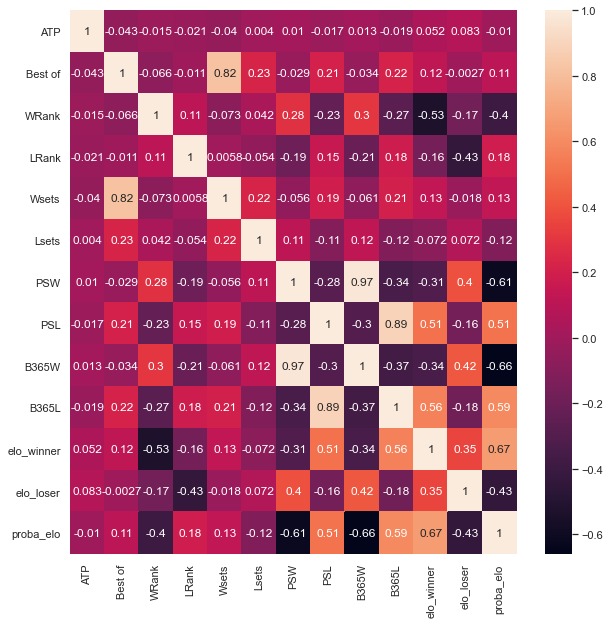

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(t1.corr(), annot=True);

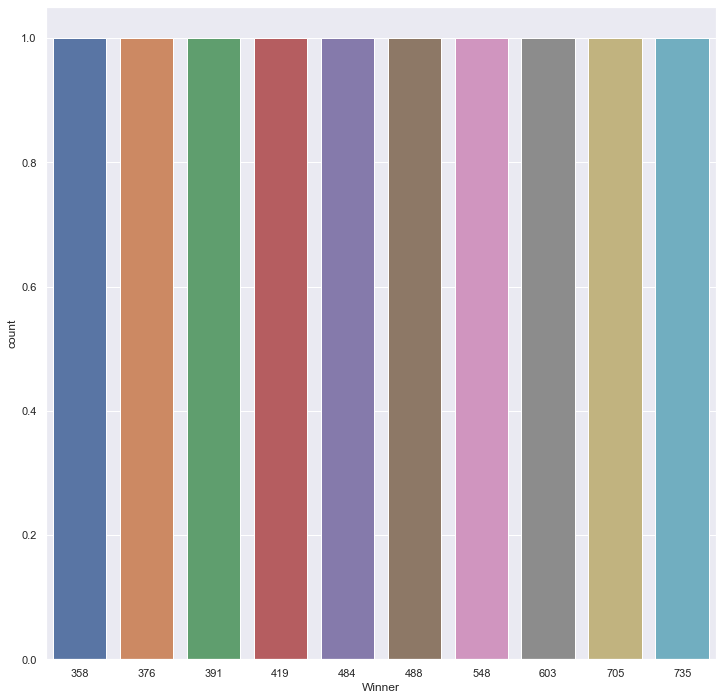

In [24]:
ten_first= t1["Winner"].value_counts().head(10)
plt.figure(figsize=(12,12))
sns.countplot(x=ten_first, data=t1);

In [25]:
t1_grouped = t1.groupby(['Tournament','Winner',"Series"]).filter(lambda x: len(x) > 20).unstack()

print(t1_grouped)


ATP        8838            6
           8840            6
           8846            6
           8851            6
           8879            6
                      ...   
proba_elo  44402    0.629094
           44406    0.801809
           44426    0.557004
           44441    0.411707
           44653    0.428784
Length: 51520, dtype: object


In [26]:


t1_grouped = t1.groupby(['Winner', 'Tournament',"Series"]).agg({"Series": "sum"}).unstack()

print(t1_grouped)

                                                        Series         \
Series                                                  ATP250 ATP500   
Winner             Tournament                                           
 Hajek J.          Campionati Internazionali Di Sicilia    NaN    NaN   
Acasuso J.         ATP Buenos Aires 2004                   NaN    NaN   
                   ATP Buenos Aires 2005                   NaN    NaN   
                   Abierto Mexicano                        NaN    NaN   
                   Bellsouth Open                          NaN    NaN   
...                                                        ...    ...   
van Gemerden M.    Wimbledon                               NaN    NaN   
van Lottum J.      Ordina Open                             NaN    NaN   
                   TATA Open                               NaN    NaN   
van Scheppingen D. Priority Telecom Dutch Open             NaN    NaN   
                   Thailand Open                   

In [27]:
#t1 n'était pas éfini donc j'ai copié le chemin d'accès de nouveau
t1=pd.read_csv(r"C:\Users\Administrateur.OTR-2018-503\Downloads\mess\atp_data.csv", sep=",")

t1_grouped_surface = t1.groupby(['Tournament' , 'Series']).agg({'Surface': 'sum'})

#afficher le résultat
print(t1_grouped_surface)



                                                                                                           Surface
Tournament                                   Series                                                               
AAPT Championships                           International       HardHardHardHardHardHardHardHardHardHardHardHa...
ABN AMRO World Tennis Tournament             ATP500              HardHardHardHardHardHardHardHardHardHardHardHa...
                                             International Gold  HardHardHardHardHardHardHardHardHardHardHardHa...
AEGON Championships                          ATP250              GrassGrassGrassGrassGrassGrassGrassGrassGrassG...
                                             ATP500              GrassGrassGrassGrassGrassGrassGrassGrassGrassG...
...                                                                                                            ...
Wimbledon                                    Grand Slam          GrassGrassGrass

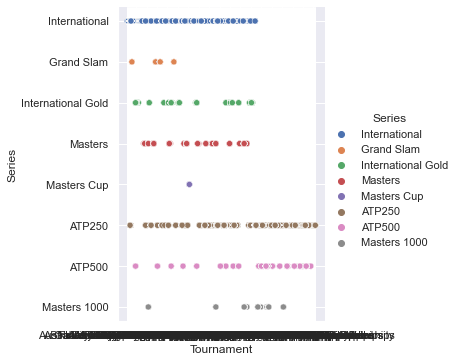

In [105]:
#j'ai recopié le chemin d'accès
t1=pd.read_csv(r"C:\Users\Administrateur.OTR-2018-503\Downloads\mess\atp_data.csv", sep=",")
sns.relplot(x="Tournament", y="Series", hue="Series", data= t1); #ici, j'ai supprimé -grouped à t1_grouped
plt.show()

                                       SCINDONS LA COLONNE WINNER EN DEUX CATEGORIES

In [107]:
t1["Winner"].value_counts()

Federer R.     970
Nadal R.       803
Djokovic N.    687
Ferrer D.      632
Murray A.      560
              ... 
Gonzalez S.      1
Burrieza O.      1
Tarallo S.       1
Teixeira M.      1
Iwami T.         1
Name: Winner, Length: 899, dtype: int64

In [108]:
player_wins = t1['Winner'].value_counts()


t1['Wins Over 300'] = t1['Winner'].apply(lambda x: player_wins[x] > 300)

players_over_300_wins = t1[t1['Wins Over 300'] == True]
players_under_300_wins = t1[t1['Wins Over 300'] == False]

t1

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo,Wins Over 300
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000,False
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000,False
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,1.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000,False
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,1.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000,False
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,17,Dubai,Dubai Tennis Championships,2018-03-03,ATP500,Outdoor,Hard,The Final,3,Bautista Agut R.,...,0.0,Completed,1.65,2.43,1.66,2.20,1835.901543,1842.459807,0.490563,False
44704,16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,3,Anderson K.,...,1.0,Completed,1.34,3.63,1.30,3.50,1843.576914,1647.967561,0.755103,False
44705,18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,3,Jarry N.,...,1.0,Completed,1.85,2.09,1.90,1.90,1588.293069,1619.758421,0.454841,False
44706,16,Acapulco,Abierto Mexicano,2018-03-04,ATP500,Outdoor,Hard,The Final,3,Del Potro J.M.,...,0.0,Completed,1.52,2.75,1.50,2.62,1966.532849,1851.413609,0.659862,True


In [31]:
var_num = t1.select_dtypes(["int","float"])

var_num.head()

,Wsets,Lsets,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,2.0,0.0,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,2.0,0.0,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,2.0,1.0,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,2.0,1.0,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,2.0,0.0,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [32]:
var_cat = t1.select_dtypes(["object"])

var_cat.head()

,Location,Tournament,Date,Series,Court,Surface,Round,Winner,Loser,Comment
0,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,Dosedel S.,Ljubicic I.,Completed
1,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,Kiefer N.,Tarango J.,Completed
2,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,Gaudio G.,Luxa P.,Completed
3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,El Aynaoui Y.,Dupuis A.,Completed
4,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,Cherkasov A.,Arazi H.,Completed


In [33]:


print("Le tournant le plus présent ou joué est ", var_cat["Tournament"].mode())

Le tournant le plus présent ou joué est  0    Australian Open
dtype: object


Wsets
Lsets
PSW
PSL
B365W
B365L
elo_winner
elo_loser
proba_elo


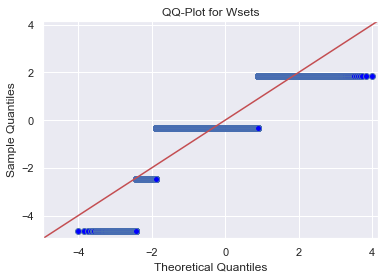

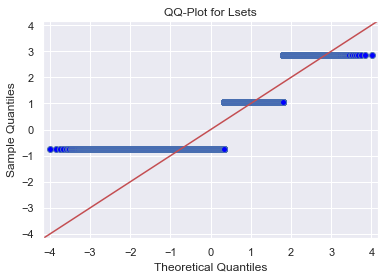

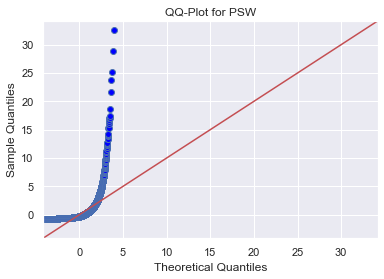

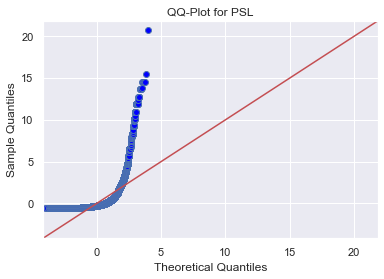

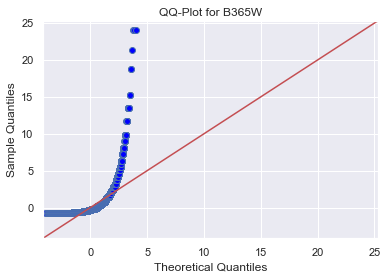

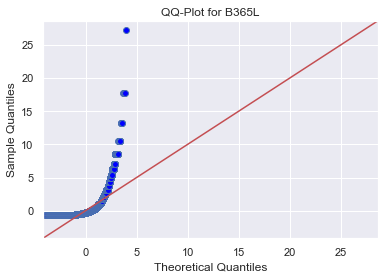

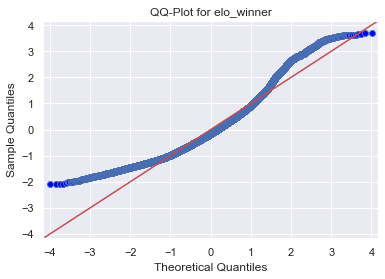

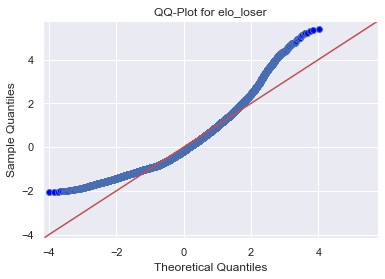

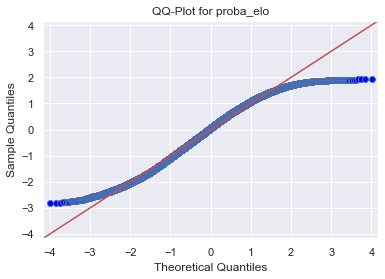

In [36]:
import statsmodels.api as sm


#for column in var_num.columns:
  #  print(column)
    #sm.qqplot(var_num[column], line='45', fit = True)
    
    
    
#je dois supprimer les valeurs non-finies des données (var_num)

var_num_cleaned = var_num.dropna()

#il faut maintenant parcourir les colonnes de var_num_cleaned et le tracé du QQ-plot

for column in var_num_cleaned.columns:
    print(column)
    sm.qqplot(var_num_cleaned[column], line='45', fit=True)
    plt.title(f"QQ-Plot for {column}")
    plt.show

In [38]:
# Les variables elo_winner et proba_elo s'approchent des quantiles d'une loi normale. pour le reste ce n'est pas le cas et la distribution diffère considérablement

In [39]:
t1["Date"]

Grouper_mois = pd.Grouper(key =t1["Date"], freq="m" )

type(Grouper_mois)

pandas.core.resample.TimeGrouper

In [40]:

#print("La somme des victoires par mois :")

#Grouper_mois_win = t1.groupby([Grouper_mois], t1["Wsets"]).agg({"Tournament":"sum"}).unstack()




#je convertis la colonne Date en datetime puis j'extrait le mois de la colonne date
t1['Date'] = pd.to_datetime(t1['Date'])
t1['Month'] = t1['Date'].dt.month

#je groupe ensuite les données par mois et calcule la somme des victoires
Grouper_mois_win = t1.groupby('Month')['Wsets'].sum()

print("La somme des victoires par mois : ")
print (Grouper_mois_win)


La somme des victoires par mois : 
Month
1     11360.0
2     10384.0
3      6739.0
4      7271.0
5     11077.0
6     10472.0
7     10218.0
8     10100.0
9      6129.0
10     9254.0
11     1962.0
12      337.0
Name: Wsets, dtype: float64


In [41]:
#somme_victoires_par_mois = groupe_par_mois["Wsets"].sum()

Grouper_mois_win = t1.groupby('Month')['Wsets'].sum()

In [42]:
#groupe_par_mois = t1.groupby(Grouper_mois)

#pas la peine de réutiliser groupby puisqu'elle contient déjà les données groupées par mois
print(Grouper_mois_win)

Month
1     11360.0
2     10384.0
3      6739.0
4      7271.0
5     11077.0
6     10472.0
7     10218.0
8     10100.0
9      6129.0
10     9254.0
11     1962.0
12      337.0
Name: Wsets, dtype: float64


In [57]:
import pandas as pd
import scipy.stats as stats

#il faut supprimerf les lignes avec des valeurs manuantes
t1_cleaned = t1.dropna(subset=["PSW", "elo_winner", "PSL", "elo_loser"])

# Test de corrélation entre les cotes de paris (PSW et PSL) et les scores Elo des joueurs
#correlation_psw_elo = stats.pearsonr(t1_["PSW"], t1_["elo_winner"])
#correlation_psl_elo = stats.pearsonr(t1_["PSL"], t1_["elo_loser"])

correlation_psw_elo = stats.pearsonr(t1_cleaned["PSW"], t1_cleaned["elo_winner"])
correlation_psl_elo = stats.pearsonr(t1_cleaned["PSL"], t1_cleaned["elo_loser"])

print("\nTest de corrélation entre les cotes PSW et les scores Elo des gagnants :")
print("Coefficient de corrélation :", correlation_psw_elo[0])
print("p-valeur :", correlation_psw_elo[1])
print("\nTest de corrélation entre les cotes PSL et les scores Elo des perdants :")
print("Coefficient de corrélation :", correlation_psl_elo[0])
print("p-valeur :", correlation_psl_elo[1])

# Test de normalité pour la variable PSW
shapiro_test_psw = stats.shapiro(t1["PSW"])

print("\nTest de normalité pour les cotes PSW :")
print("Statistique de test :", shapiro_test_psw.statistic)
print("p-valeur :", shapiro_test_psw.pvalue)

# Test de Chi-carré pour évaluer l'indépendance entre deux variables catégorielles (par exemple, Winner et Round)
contingency_table = pd.crosstab(t1["Winner"], t1["Round"])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("\nTest de Chi-carré pour évaluer l'indépendance entre Winner et Round :")
print("Statistique de test :", chi2)
print("p-valeur :", p_val)




Test de corrélation entre les cotes PSW et les scores Elo des gagnants :
Coefficient de corrélation : -0.30911818592664286
p-valeur : 0.0

Test de corrélation entre les cotes PSL et les scores Elo des perdants :
Coefficient de corrélation : -0.1585420438559971
p-valeur : 2.851612017044909e-183

Test de normalité pour les cotes PSW :
Statistique de test : nan
p-valeur : 1.0

Test de Chi-carré pour évaluer l'indépendance entre Winner et Round :
Statistique de test : 9722.030619309631
p-valeur : 1.6550025515009537e-153


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


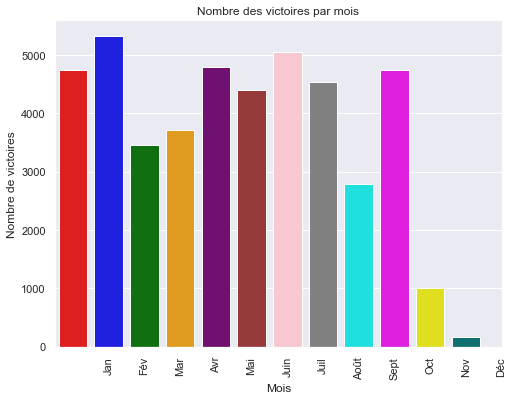

In [58]:
import seaborn as sns

import matplotlib.pyplot as plt



t1["Mois"] = t1["Date"].dt.month

victoires_par_mois = t1["Mois"].value_counts()



couleurs = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'teal']

victoires_par_mois = victoires_par_mois.sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x = victoires_par_mois.index, y=victoires_par_mois.values, palette=couleurs)
plt.xlabel("Mois")
plt.ylabel("Nombre de victoires")
plt.xticks(victoires_par_mois.index, labels=["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sept", "Oct", "Nov", "Déc"], rotation='vertical')
plt.title("Nombre des victoires par mois")
plt.show()

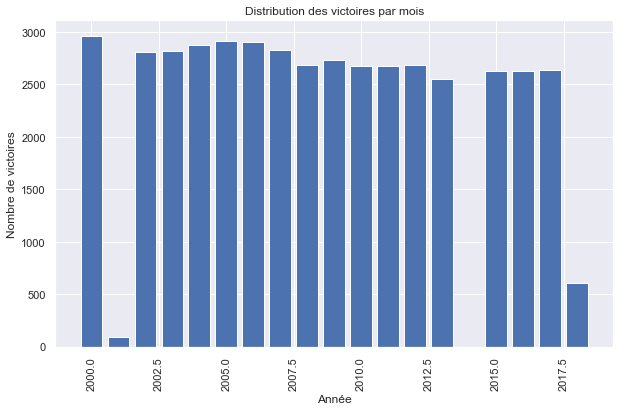

In [65]:
t1["Année"] = t1["Date"].dt.year

victoires_par_Année = t1["Année"].value_counts()

victoires_par_Année = victoires_par_Année.sort_index()

plt.figure(figsize=(10, 6))
plt.bar(victoires_par_Année.index, victoires_par_Année.values)
plt.xlabel("Année")
plt.ylabel("Nombre de victoires")

#18 annes dans le victoirParAnnée ... hors ici 13 13 étiquettes donc là, le graphiqye génère en fonction de étiquette
plt.xticks(rotation='vertical')

#plt.xticks(victoires_par_Année.index, labels=["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"], rotation='vertical')
plt.title("Distribution des victoires par mois")
plt.show()

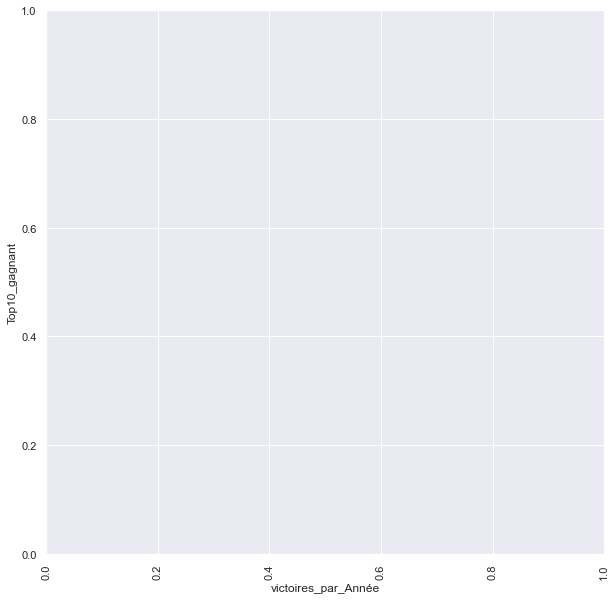

In [68]:
Top10_gagnant = t1["Winner"].value_counts().head(10)

fig = plt.figure(figsize=(10,10))

plt.xlabel("victoires_par_Année")

plt.ylabel("Top10_gagnant")

plt.xticks(rotation='vertical') #mem chose ici

#plt.xticks(victoires_par_Année, labels=["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"], rotation='vertical')

plt.show()

In [110]:
t1["Winner"].value_counts()



Federer R.     970
Nadal R.       803
Djokovic N.    687
Ferrer D.      632
Murray A.      560
              ... 
Gonzalez S.      1
Burrieza O.      1
Tarallo S.       1
Teixeira M.      1
Iwami T.         1
Name: Winner, Length: 899, dtype: int64

In [116]:
t1["Winning_Player"] = ""


# Parcourir chaque ligne du DataFrame
for index, row in t1.iterrows():
    # Si le joueur "J1" a gagné le match, attribuer son nom à la colonne "Winning_Player"
   if row["Winner"] == row["Federer R."]:
        t1.at[index, "Winning_Player"] = row["Federer R."]
    # Sinon, attribuer le nom du joueur "J2"
   else:
        t1.at[index, "Winning_Player"] = row["Nadal R."]

KeyError: 'Federer R.'

                               SEPARONS LE JEUX DE DONNEES

In [90]:
from sklearn.model_selection import train_test_split

import pandas as pd

import numpy as np

        
feat = t1[["Series","Court","Surface","Round","WRank","LRank","Wsets","Lsets","elo_winner","elo_loser"]]

target = t1["Winner"]



t1["Winner"] = ""

feat.loc[(feat["WRank"] <= feat["LRank"]) | (feat["elo_winner"] >= feat["elo_loser"]), "Winner"] = t1["Winner"]
feat.loc[(feat["WRank"] > feat["LRank"]) & (feat["elo_winner"] < feat["elo_loser"]), "Winner"] = t1["Loser"]


X_train,X_test,y_train,y_test = train_test_split(feat,target, test_size = 0.20, random_state = 48)


X_train["Round"] = X_train["Round"].replace(to_replace=['Round Robin','1st Round','2nd Round','3rd Round','4th Round','Quarterfinals','Semifinals','The Final'], value=[0,1,2,3,4,5,6,7])


X_train = pd.get_dummies(X_train)

X_train


X_test["Round"] = X_test["Round"].replace(to_replace=['Round Robin','1st Round','2nd Round','3rd Round','4th Round','Quarterfinals','Semifinals','The Final'], value=[0,1,2,3,4,5,6,7])

X_test =pd.get_dummies(X_test)


X_train

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Round,WRank,LRank,Wsets,Lsets,elo_winner,elo_loser,Series_ATP250,Series_ATP500,Series_Grand Slam,...,Winner_Zemlja G.,Winner_Ziadi M.,Winner_Zib T.,Winner_Zopp J.,Winner_Zverev A.,Winner_Zverev M.,Winner_di Mauro A.,Winner_di Pasquale A.,Winner_van Lottum J.,Winner_van Scheppingen D.
13529,2,6,78,2.0,0.0,1862.802903,1540.374611,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40604,1,111,176,1.0,0.0,1464.242730,1464.675286,1,0,0,...,0,0,0,0,0,0,0,0,0,0
37589,2,66,14,2.0,1.0,1502.329550,1664.781310,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36630,6,149,110,2.0,1.0,1504.775511,1539.516812,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10890,1,171,12,3.0,2.0,1463.857433,1659.373711,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,2,42,117,2.0,0.0,1690.853105,1541.694086,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30148,1,53,63,1.0,0.0,1598.484024,1610.652328,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9553,2,77,71,2.0,0.0,1562.815359,1435.222454,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2611,1,42,151,0.0,0.0,1537.471207,1564.027658,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


#model.fit(X_train, y_train)


#print(model.score(X_train, y_train))

#print(model.score(X_test, y_test))

#J'ai réécrit le code de manière à ce que les colonnes X_test pour qu'elles correspondent à l'ordre X_train
X_test = X_test [X_train.columns]

#calculon et affichons le score du modèle X_test
print(model.score(X_test, y_test))



KeyError: "['Winner_Soeda G.', 'Winner_Nestor D.', 'Winner_Munoz De La Nava D.', 'Winner_Zib T.', 'Winner_Sa A.', 'Winner_Marin J.A.', 'Winner_Mertinak M.', 'Winner_Bagnis F.', 'Winner_Mamiit C.', 'Winner_Evans B.', 'Winner_Vinck C.', 'Winner_Di Pasquale A.', 'Winner_Duckworth J.', 'Winner_Dzumhur D.', 'Winner_Luzzi F.', 'Winner_Manta L.', 'Winner_Lu Y.', 'Winner_Arguello F.', 'Winner_Lajovic D.', 'Winner_Levine J.', 'Winner_Rublev A.', 'Winner_Norman D.', 'Winner_Kroslak J.', 'Winner_Chaki R.', 'Winner_Hajji A.', 'Winner_Jenkins S.', 'Winner_Galvani S.', 'Winner_Gojowczyk P.', 'Winner_El Amrani R.', 'Winner_Lamasine T.', 'Winner_Granollers G.', 'Winner_Chen T.', 'Winner_Crivoi V.', 'Winner_Tsitsipas S.', 'Winner_Healey N.', 'Winner_Hanfmann Y.', 'Winner_Tavares L.', 'Winner_Chiudinelli M.', 'Winner_Salzenstein J.', 'Winner_Garcia A.', 'Winner_Jonsson F.', 'Winner_Skoch D.', 'Winner_Herbert P.H', 'Winner_Estrella Burgos V.', 'Winner_Kim A.', 'Winner_Donskoy E.', 'Winner_Krajinovic F.', 'Winner_Zopp J.', 'Winner_Berta D.', 'Winner_Si Y.M.', 'Winner_Taino E.', 'Winner_Nielsen F.', 'Winner_Kravchuk K.', 'Winner_Karbacher B.', 'Winner_Knowle J.', 'Winner_Ilhan M.', 'Winner_Massa E.', 'Winner_Ramanathan R.', 'Winner_Sirianni J.', 'Winner_Damm M.', 'Winner_Udomchoke D.', 'Winner_Pavlasek A.', 'Winner_Ryderstedt M.', 'Winner_Gustafsson M.', 'Winner_Wessels P.', 'Winner_Cermak F.', 'Winner_Huet S.', 'Winner_Aldi F.', 'Winner_Chekov P.', 'Winner_Guardiola T.', 'Winner_Blanco G.', 'Winner_Patience O.', 'Winner_di Mauro A.', 'Winner_Vacek D.', 'Winner_Portas A.', 'Winner_di Pasquale A.', 'Winner_Junqueira D.', 'Winner_Copil M.', 'Winner_Veic A.', 'Winner_Nishioka Y.', 'Winner_Sugita Y.', 'Winner_Agenor R.', 'Winner_Krajan Z.', 'Winner_Ascione T.', 'Winner_Bozoljac I.', 'Winner_Courier J.', 'Winner_Elseneer G.', 'Winner_Wheaton D.', 'Winner_Delic M.', 'Winner_Ito T.', 'Winner_Bemelmans R.', 'Winner_Sekulic M.', 'Winner_Alund M.', 'Winner_De Schepper K.', 'Winner_Kovalik J.', 'Winner_Millot V.', 'Winner_Haehnel J.', 'Winner_Kendrick R.', 'Winner_Calatrava A.', 'Winner_Bellotti R.', 'Winner_Rehnquist B.', 'Winner_Ouahab L.', 'Winner_Levy H.', 'Winner_Opelka R.', 'Winner_Ferrero J.', 'Winner_Savolt A.', 'Winner_Polansky P.', 'Winner_Velotti A.', 'Winner_Cervantes I.', 'Winner_Riba-Madrid P.', 'Winner_Sandgren T.', 'Winner_Heuberger I.', 'Winner_Elias G.', 'Winner_Baker B.', 'Winner_Delgado J.', 'Winner_Benneteau A.', 'Winner_Tillstrom M.', 'Winner_Saulnier C.', 'Winner_Olaso G.', 'Winner_Furlan R.', 'Winner_Vacek J.', 'Winner_Koellerer D.', 'Winner_Warburg S.', 'Winner_Halys Q.', 'Winner_Berasategui A.', 'Winner_Gonzalez A.', 'Winner_Olivo R.', 'Winner_Venus M.', 'Winner_Herbert P.H.', 'Winner_Fukarek O.', 'Winner_Morrison J.', 'Winner_Kozlov S.', 'Winner_Thompson J.', 'Winner_Sekulov J.', 'Winner_Ascione A.', 'Winner_Alves T.', 'Winner_Larsson M.', 'Winner_Lopez M.', 'Winner_Siemerink J.', 'Winner_Pozzi G.', 'Winner_Dosedel S.', 'Winner_van Lottum J.', 'Winner_Burrieza O.', 'Winner_Weiner G.', 'Winner_Gambill J. M.', 'Winner_Reid T.', 'Winner_Eschauer W.', 'Winner_Coutelot N.', 'Winner_Dabul B.', 'Winner_Huta Galung J.', 'Winner_Ward A.', 'Winner_Tarango J.', 'Winner_Daniel M.', 'Winner_Draper S.', 'Winner_Economidis K.', 'Winner_Nagal S.', 'Winner_Ball C.', 'Winner_Delbonis F.', 'Winner_Motomura G.', 'Winner_Bublik A.', 'Winner_Kypson P.', 'Winner_Schukin Y.', 'Winner_Lisnard J.R.', 'Winner_Fratangelo B.', 'Winner_Alvarez E.', 'Winner_Bachelot J.F', 'Winner_Cruciat A.', 'Winner_Gonzalez S.', 'Winner_Ziadi M.', 'Winner_Bastl G.', 'Winner_Peya A.', 'Winner_Hajek J.', 'Winner_Stanoytchev O.'] not in index"

In [112]:

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

ValueError: X has 366 features, but MinMaxScaler is expecting 518 features as input.